In [1]:
%matplotlib inline

# 2 - Static Connectivity

In this short tutorial, we will compute the static connectivity of the EEG singals.

- - -

### Load data

In [2]:
import numpy as np

In [3]:
import scipy
from scipy import io

In [4]:
eeg = np.load("data/eyes_opened.npy")

num_trials, num_channels, num_samples = np.shape(eeg)

In [5]:
eeg1 = np.squeeze(eeg[0, :, :])

### Static connectivity

As a first example, we are going to compute the static connectivity of the EEG signals using the IPLV estimator.

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from dyconnmap.fc import iplv

Define the frequency band we are interested to examine, in Hz

In [7]:
band = [1.0, 4.0]

Define the sampling frequency, in Hz

In [8]:
sampling_frequency = 160.0

We will invoke the estimator using the full by-name arguments. The last arguement, `pairs` is `None` by default, which means all "full connectivity", otherwise you check the documentation about the structure of the value.

In [9]:
ts, avg = iplv(eeg1, fb=band, fs=sampling_frequency, pairs=None)

In [10]:
print("""Time series array shape: {0}
Average time series array shape: {1}""".format(np.shape(ts), np.shape(avg)))

Time series array shape: (64, 64, 9600)
Average time series array shape: (64, 64)


Make the connectivity matrix symmetric

In [11]:
avg_symm = avg + avg.T
np.fill_diagonal(avg_symm, 1.0)

### Plot

Plot the matrix using the standard Matplotlib functions

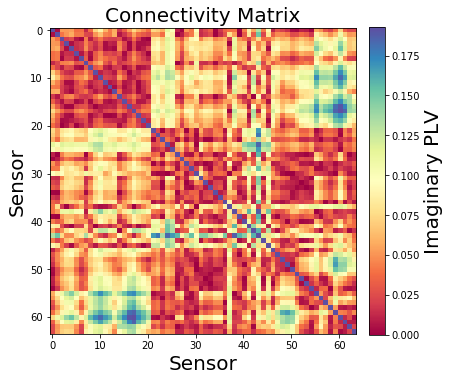

In [12]:
import matplotlib.pyplot as plt

mtx_min = 0.0 # we know it's 0.0 because of the estimator's properties
mtx_max = np.max(avg)

plt.figure(figsize=(6, 6))
cax = plt.imshow(avg_symm, vmin=mtx_min, vmax=mtx_max, cmap=plt.cm.Spectral)
cb = plt.colorbar(fraction=0.046, pad=0.04)
cb.ax.set_ylabel('Imaginary PLV', fontdict={'fontsize': 20})
plt.title('Connectivity Matrix', fontdict={'fontsize': 20})
plt.xlabel('Sensor', fontdict={'fontsize': 20})
plt.ylabel('Sensor', fontdict={'fontsize': 20})
plt.show()